#  DSC478 - Programming Machine Learning Applications
## Assignment 2 - Lavinia Wang

### Question 2. Classification using scikit-learn

Dataset: <a href='http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/bank_data.csv'>bank_data.csv</a>

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Change working directory
os.chdir('/resources/CSC478/Assignment2')

#### a. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikitlearn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split).

In [3]:
## Load text file via read_csv
bank_df = pd.read_csv("bank_data.csv")
## Get top 5 instances
bank_df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [4]:
bank_df.shape

(600, 12)

Separate the target attribute "pep" and the attributes used for model training.

In [5]:
# Remove pep from data frame, and userID
modelDT = bank_df.iloc[:,1:11]
modelDT.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [6]:
# Extract target varaible 
pep = bank_df.iloc[:,11:12]
pep.head()

,pep
0,YES
1,NO
2,NO
3,NO
4,NO


Next, we use Pandas "get_dummies" function to create dummy variables to convert the selected dataset into the Standard Spreadsheet format.

In [7]:
# Make binary varaibles in spreadsheet format
modelDT.replace(to_replace = ['YES', 'NO'], value = [1.0, 0.0], inplace = True)

# make dummy variables for other columns
modelDT_numeric= pd.get_dummies(modelDT)
modelDT_numeric.head()
#modelDT_numeric.shape

,age,income,children,married,car,savings_acct,current_acct,mortgage,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,48,17546.0,1,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
1,40,30085.1,3,1.0,1.0,0.0,1.0,1.0,0,1,0,0,0,1
2,51,16575.4,0,1.0,1.0,1.0,1.0,0.0,1,0,1,0,0,0
3,23,20375.4,3,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1
4,57,50576.3,0,1.0,0.0,1.0,0.0,0.0,1,0,0,1,0,0


Perform min-max normalization to rescale numeric attributes.

In [8]:
# Normalize the numeric data
Scaler = MinMaxScaler()
modelDT_numeric[['age', 'income', 'children']] = Scaler.fit_transform(modelDT_numeric[['age', 'income', 'children']])
modelDT_numeric.head()

,age,income,children,married,car,savings_acct,current_acct,mortgage,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,0.612245,0.215634,0.333333,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
1,0.448980,0.431395,1.000000,1.0,1.0,0.0,1.0,1.0,0,1,0,0,0,1
2,0.673469,0.198933,0.000000,1.0,1.0,1.0,1.0,0.0,1,0,1,0,0,0
3,0.102041,0.264320,1.000000,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1
4,0.795918,0.783987,0.000000,1.0,0.0,1.0,0.0,0.0,1,0,0,1,0,0


Divide the data into randomized training(80%) and test(20%) partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation".

In [9]:
# Create 80-20 split 
X_train, X_test, y_train, y_test = train_test_split(modelDT_numeric, pep, test_size=0.2, random_state = 33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(480, 14) (120, 14) (480, 1) (120, 1)


Note: <b>DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().</b>

In [10]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
print(y_train.shape, y_test.shape)

(480,) (120,)


#### b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [11]:
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

Next, we call the predict function on the test intances to produce the predicted classes.

In [12]:
knnpreds_test = knnclf.predict(X_test)
print(knnpreds_test)

['NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO']


In [13]:
#create a confusion matrix
knncm = confusion_matrix(y_test, knnpreds_test)
print( knncm)

[[46 20]
 [26 28]]


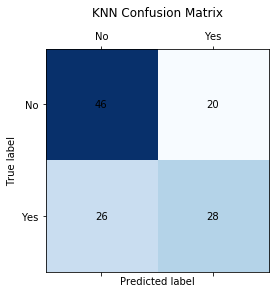

In [14]:
# Use matplotlib to visualize the confusion matrix
plt.matshow(knncm, cmap = plt.cm.Blues)
plt.title("KNN Confusion Matrix\n")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(knncm.shape[0]):
    for x in range(knncm.shape[1]):
        plt.text(x, y, '{}'.format(knncm[y,x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [15]:
# Generate a classification report
print(classification_report(y_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.64      0.70      0.67        66
        YES       0.58      0.52      0.55        54

avg / total       0.61      0.62      0.61       120



We can also compute the average accuracy score across the test instances.

In [16]:
acc = []
acc0 = knnclf.score(X_test, y_test)
print("Accuracy is {}".format(acc0))
acc.append(acc0)

Accuracy is 0.6166666666666667


<b>Tweak KNN model, and evaluate model performance.</b> <br> Begin with # of k.

In [17]:
# case 1
n_neighbors1 = 3
knnclf1 = neighbors.KNeighborsClassifier(n_neighbors1, weights='distance')
knnclf1.fit(X_train, y_train)
knnpreds_test1 = knnclf1.predict(X_test)
print(classification_report(y_test, knnpreds_test1))
acc1 = knnclf1.score(X_test, y_test)
print("Accuracy is {}".format(acc1))
acc.append(acc1)

             precision    recall  f1-score   support

         NO       0.64      0.65      0.65        66
        YES       0.57      0.56      0.56        54

avg / total       0.61      0.61      0.61       120

Accuracy is 0.6083333333333333


In [18]:
# case 2
n_neighbors2 = 7
knnclf2 = neighbors.KNeighborsClassifier(n_neighbors2, weights='distance')
knnclf2.fit(X_train, y_train)
knnpreds_test2 = knnclf.predict(X_test)
print(classification_report(y_test, knnpreds_test2))
acc2 = knnclf2.score(X_test, y_test)
print("Accuracy is {}".format(acc2))
acc.append(acc2)

             precision    recall  f1-score   support

         NO       0.64      0.70      0.67        66
        YES       0.58      0.52      0.55        54

avg / total       0.61      0.62      0.61       120

Accuracy is 0.6333333333333333


In [19]:
# case 3
n_neighbors3 = 9
knnclf3 = neighbors.KNeighborsClassifier(n_neighbors3, weights='distance')
knnclf3.fit(X_train, y_train)
knnpreds_test3 = knnclf3.predict(X_test)
print(classification_report(y_test, knnpreds_test3))
acc3 = knnclf3.score(X_test, y_test)
print("Accuracy is {}".format(acc3))
acc.append(acc3)

             precision    recall  f1-score   support

         NO       0.67      0.68      0.68        66
        YES       0.60      0.59      0.60        54

avg / total       0.64      0.64      0.64       120

Accuracy is 0.6416666666666667


In [20]:
# case 4
n_neighbors4 = 5
knnclf4 = neighbors.KNeighborsClassifier(n_neighbors4, weights='uniform')
knnclf4.fit(X_train, y_train)
knnpreds_test4 = knnclf4.predict(X_test)
print(classification_report(y_test, knnpreds_test4))
acc4 = knnclf4.score(X_test, y_test)
print("Accuracy is {}".format(acc4))
acc.append(acc4)

             precision    recall  f1-score   support

         NO       0.63      0.67      0.65        66
        YES       0.56      0.52      0.54        54

avg / total       0.60      0.60      0.60       120

Accuracy is 0.6


In [21]:
# case 5
n_neighbors5 = 3
knnclf5 = neighbors.KNeighborsClassifier(n_neighbors5, weights='uniform')
knnclf5.fit(X_train, y_train)
knnpreds_test5 = knnclf5.predict(X_test)
print(classification_report(y_test, knnpreds_test5))
acc5 = knnclf5.score(X_test, y_test)
print("Accuracy is {}".format(acc5))
acc.append(acc5)

             precision    recall  f1-score   support

         NO       0.66      0.65      0.66        66
        YES       0.58      0.59      0.59        54

avg / total       0.63      0.62      0.63       120

Accuracy is 0.625


In [22]:
# case 6
n_neighbors6 = 7
knnclf6 = neighbors.KNeighborsClassifier(n_neighbors6, weights='uniform')
knnclf6.fit(X_train, y_train)
knnpreds_test6 = knnclf6.predict(X_test)
print(classification_report(y_test, knnpreds_test6))
acc6 = knnclf6.score(X_test, y_test)
print("Accuracy is {}".format(acc6))
acc.append(acc6)

             precision    recall  f1-score   support

         NO       0.64      0.65      0.65        66
        YES       0.57      0.56      0.56        54

avg / total       0.61      0.61      0.61       120

Accuracy is 0.6083333333333333


In [23]:
# case 7
n_neighbors7 = 9
knnclf7 = neighbors.KNeighborsClassifier(n_neighbors7, weights='uniform')
knnclf7.fit(X_train, y_train)
knnpreds_test7 = knnclf7.predict(X_test)
print(classification_report(y_test, knnpreds_test7))
acc7 = knnclf7.score(X_test, y_test)
print("Accuracy is {}".format(acc7))
acc.append(acc7)

             precision    recall  f1-score   support

         NO       0.66      0.74      0.70        66
        YES       0.63      0.54      0.58        54

avg / total       0.65      0.65      0.65       120

Accuracy is 0.65


In [24]:
# case 8
n_neighbors8 = 5
knnclf8 = neighbors.KNeighborsClassifier(n_neighbors8, weights='distance', metric = 'euclidean')
knnclf8.fit(X_train, y_train)
knnpreds_test8 = knnclf8.predict(X_test)
print(classification_report(y_test, knnpreds_test8))
acc8 = knnclf8.score(X_test, y_test)
print("Accuracy is {}".format(acc8))
acc.append(acc8)

             precision    recall  f1-score   support

         NO       0.64      0.70      0.67        66
        YES       0.58      0.52      0.55        54

avg / total       0.61      0.62      0.61       120

Accuracy is 0.6166666666666667


In [25]:
# case 9
n_neighbors9 = 3
knnclf9 = neighbors.KNeighborsClassifier(n_neighbors9, weights='distance', metric = 'euclidean')
knnclf9.fit(X_train, y_train)
knnpreds_test9 = knnclf9.predict(X_test)
print(classification_report(y_test, knnpreds_test9))
acc9 = knnclf9.score(X_test, y_test)
print("Accuracy is {}".format(acc9))
acc.append(acc9)

             precision    recall  f1-score   support

         NO       0.64      0.65      0.65        66
        YES       0.57      0.56      0.56        54

avg / total       0.61      0.61      0.61       120

Accuracy is 0.6083333333333333


In [26]:
# case 10
n_neighbors10 = 7
knnclf10 = neighbors.KNeighborsClassifier(n_neighbors10, weights='distance', metric = 'euclidean')
knnclf10.fit(X_train, y_train)
knnpreds_test10 = knnclf10.predict(X_test)
print(classification_report(y_test, knnpreds_test10))
acc10 = knnclf10.score(X_test, y_test)
print("Accuracy is {}".format(acc10))
acc.append(acc10)

             precision    recall  f1-score   support

         NO       0.65      0.71      0.68        66
        YES       0.60      0.54      0.57        54

avg / total       0.63      0.63      0.63       120

Accuracy is 0.6333333333333333


In [27]:
# case 11
n_neighbors11 = 9
knnclf11 = neighbors.KNeighborsClassifier(n_neighbors11, weights='distance', metric = 'euclidean')
knnclf11.fit(X_train, y_train)
knnpreds_test11 = knnclf11.predict(X_test)
print(classification_report(y_test, knnpreds_test11))
acc11 = knnclf11.score(X_test, y_test)
print("Accuracy is {}".format(acc11))
acc.append(acc11)

             precision    recall  f1-score   support

         NO       0.67      0.68      0.68        66
        YES       0.60      0.59      0.60        54

avg / total       0.64      0.64      0.64       120

Accuracy is 0.6416666666666667


In [28]:
# case 12
n_neighbors12 = 5
knnclf12 = neighbors.KNeighborsClassifier(n_neighbors12, weights='distance', metric = 'manhattan')
knnclf12.fit(X_train, y_train)
knnpreds_test12 = knnclf12.predict(X_test)
print(classification_report(y_test, knnpreds_test12))
acc12 = knnclf12.score(X_test, y_test)
print("Accuracy is {}".format(acc12))
acc.append(acc12)

             precision    recall  f1-score   support

         NO       0.66      0.70      0.68        66
        YES       0.60      0.56      0.58        54

avg / total       0.63      0.63      0.63       120

Accuracy is 0.6333333333333333


In [29]:
# case 13
n_neighbors13 = 3
knnclf13 = neighbors.KNeighborsClassifier(n_neighbors13, weights='distance', metric = 'manhattan')
knnclf13.fit(X_train, y_train)
knnpreds_test13 = knnclf13.predict(X_test)
print(classification_report(y_test, knnpreds_test13))
acc13 = knnclf13.score(X_test, y_test)
print("Accuracy is {}".format(acc13))
acc.append(acc13)

             precision    recall  f1-score   support

         NO       0.66      0.70      0.68        66
        YES       0.60      0.56      0.58        54

avg / total       0.63      0.63      0.63       120

Accuracy is 0.6333333333333333


In [30]:
# case 14
n_neighbors14 = 7
knnclf14 = neighbors.KNeighborsClassifier(n_neighbors14, weights='distance', metric = 'manhattan')
knnclf14.fit(X_train, y_train)
knnpreds_test14 = knnclf14.predict(X_test)
print(classification_report(y_test, knnpreds_test14))
acc14 = knnclf14.score(X_test, y_test)
print("Accuracy is {}".format(acc14))
acc.append(acc14)

             precision    recall  f1-score   support

         NO       0.64      0.67      0.65        66
        YES       0.57      0.54      0.55        54

avg / total       0.61      0.61      0.61       120

Accuracy is 0.6083333333333333


In [31]:
# case 15
n_neighbors15 = 9
knnclf15 = neighbors.KNeighborsClassifier(n_neighbors15, weights='distance', metric = 'manhattan')
knnclf15.fit(X_train, y_train)
knnpreds_test15 = knnclf15.predict(X_test)
print(classification_report(y_test, knnpreds_test15))
acc15 = knnclf15.score(X_test, y_test)
print("Accuracy is {}".format(acc15))
acc.append(acc15)

             precision    recall  f1-score   support

         NO       0.68      0.68      0.68        66
        YES       0.61      0.61      0.61        54

avg / total       0.65      0.65      0.65       120

Accuracy is 0.65


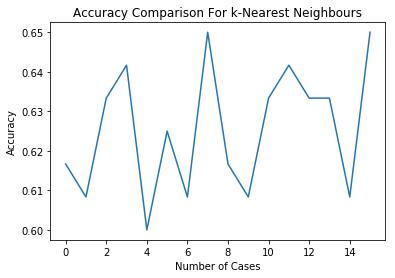

In [32]:
caseNum = [i for i in range (0,16)]
plt.plot(caseNum, acc)
plt.xlabel("Number of Cases")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison For k-Nearest Neighbours")
plt.show()

<b>Findings:</b><br>
Increasing k:
<br>
* Accuracy peaks at around 65% (around k=9)<br>

Changing weights:
<br>
* Using uniform weighting is not doing better than distance weighting except k=9<br>

Distance measure:
<br>
* Manhattan seems to have better accuracy than Euclidean    

#### c. Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance tradeoff?

<b> Decison Tree 

In [57]:
# Decision tree classifier (default paramters)
treeclf = tree.DecisionTreeClassifier(random_state = 9)
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)
print(treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO']


In [58]:
# Compare teh accuracy on the train set
acc_train = treeclf.score(X_train, y_train)
print("Accuracy of train data is {:.2}".format(acc_train))

Accuracy of train data is 1.0


In [59]:
acc_test = treeclf.score(X_test, y_test)
print("Accuracy of test data is {:.2}".format(acc_test))

Accuracy of test data is 0.82


In [60]:
# Generate confusion matrix
treecm = confusion_matrix(y_test, treepreds_test)
print(treecm)

[[57  9]
 [12 42]]


In [61]:
# Create classification report
print(classification_report(y_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.83      0.86      0.84        66
        YES       0.82      0.78      0.80        54

avg / total       0.82      0.82      0.82       120



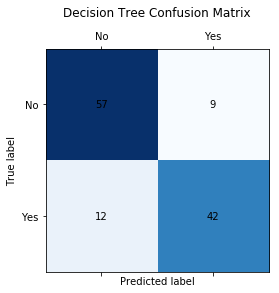

In [62]:
# Use matplotlib to visualize the confusion matrix
plt.matshow(treecm, cmap = plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix\n")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(treecm.shape[0]):
    for x in range(treecm.shape[1]):
        plt.text(x, y, '{}'.format(treecm[y,x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [63]:
# Decision tree with modified parameters
treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 10, random_state = 9)
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)

# Compare teh accuracy on the train set and test set
acc_train = treeclf.score(X_train, y_train)
print("Accuracy of train data is {:.2}".format(acc_train))
acc_test = treeclf.score(X_test, y_test)
print("Accuracy of test data is {:.2}".format(acc_test))

# Generate confusion matrix
treecm = confusion_matrix(y_test, treepreds_test)
print(treecm)

# Create classification report
print(classification_report(y_test, treepreds_test))

Accuracy of train data is 0.91
Accuracy of test data is 0.85
[[62  4]
 [14 40]]
             precision    recall  f1-score   support

         NO       0.82      0.94      0.87        66
        YES       0.91      0.74      0.82        54

avg / total       0.86      0.85      0.85       120



In [64]:
# Decision tree with modified parameters
treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 50, random_state = 9)
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)

# Compare teh accuracy on the train set and test set
acc_train = treeclf.score(X_train, y_train)
print("Accuracy of train data is {:.2}".format(acc_train))
acc_test = treeclf.score(X_test, y_test)
print("Accuracy of test data is {:.2}".format(acc_test))

# Generate confusion matrix
treecm = confusion_matrix(y_test, treepreds_test)
print(treecm)

# Create classification report
print(classification_report(y_test, treepreds_test))

Accuracy of train data is 0.79
Accuracy of test data is 0.7
[[46 20]
 [16 38]]
             precision    recall  f1-score   support

         NO       0.74      0.70      0.72        66
        YES       0.66      0.70      0.68        54

avg / total       0.70      0.70      0.70       120



* If we keep the default parameters, that is minimum samples per leaf value to be 1 (very complex tree), we can see that we are getting 100% accuracy on training data but accuracy on testing data comes out to be 80% which shows that we are <b>overfitting</b> the data in our model and it performs very well on training set but its performance goes down on testing data and training and testing accuracies are not within acceptable ranges (more than 10% difference). <br>

* So here we can see that the accuracy we get using decision tree when we change one of its parameters, is 85% on testing data and 91% on training data, so testing and training accuracy are within acceptable ranges (less than 10% difference) and there is no bias-variance trade off or in other words underfitting or overfitting.<br>

* If we keep the minimum samples per leaf value to be high and equal to 50 (comparatively simple tree), we can see that the accuracy on both testing and training comes down to around 70% and 79%, which is probably we are <b>underfitting</b> the data and keeping the models too simple, which is resulting into high bias, which can cause an algorithm to miss the relevant relations between features and target outputs (in other words underfitting).

<b> Naive Bayes

In [51]:
# Repeat thhe process with the naive Bayes (Gaussian) classifier.
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(X_train, y_train)
nbpreds_test = nbclf.predict(X_test)
print(nbpreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO']


In [52]:
# Compare teh accuracy on the train set
acc_train = nbclf.score(X_train, y_train)
print("Accuracy of train data is {:.2}".format(acc_train))

Accuracy of train data is 0.65


In [53]:
acc_test = nbclf.score(X_test, y_test)
print("Accuracy of test data is {:.2}".format(acc_test))

Accuracy of test data is 0.61


In [55]:
# Generate confusion matrix
NBcm = confusion_matrix(y_test, nbpreds_test)
print(treecm)

[[62  4]
 [14 40]]


In [54]:
# Create classification report
print(classification_report(y_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.63      0.70      0.66        66
        YES       0.57      0.50      0.53        54

avg / total       0.61      0.61      0.60       120



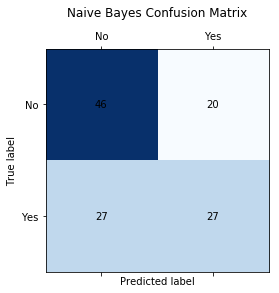

In [56]:
# Use matplotlib to visualize the confusion matrix
plt.matshow(NBcm, cmap = plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix\n")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(NBcm.shape[0]):
    for x in range(NBcm.shape[1]):
        plt.text(x, y, '{}'.format(NBcm[y,x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

The accuracy we get using naive bayes, is 61% on testing data and 65% on training data, so testing and training accuracy are within acceptable ranges (less than 10% difference) and there is no bias-variance trade off or in other words underfitting or overfitting.

#### d. Discuss your observations based on the above experiments.

<b>Decision Tree works best on this given dataset in the task of classifying the records into whether they will buy PEP or not. The accuracy for decision tree with modified parameters comes out to be 85% on training data where as the peak accuracy achieved using k-Nearest Neighbour classifier is around 65% depending on the k selected and Naive Bayes classifies with 61% accuracy on testing data.